  House ID  Location  Size (sq. ft.)  Number of Rooms  Number of Bathrooms  \
0     H001  Suburban             847                2                    1   
1     H002     Urban            3586                2                    2   
2     H003     Urban            3752                4                    1   
3     H004     Urban            1269                2                    1   
4     H005     Rural            3592                6                    2   

   Year Built  Distance to City Center (km)  Nearby Amenities  Price (USD)  
0        2000                          39.5                12       156851  
1        1984                          30.7                 3       781059  
2        1982                          16.8                14       860004  
3        2022                          22.6                 8       366232  
4        1999                          34.1                15       941597  
       Size (sq. ft.)  Number of Rooms  Number of Bathrooms  Year Bui

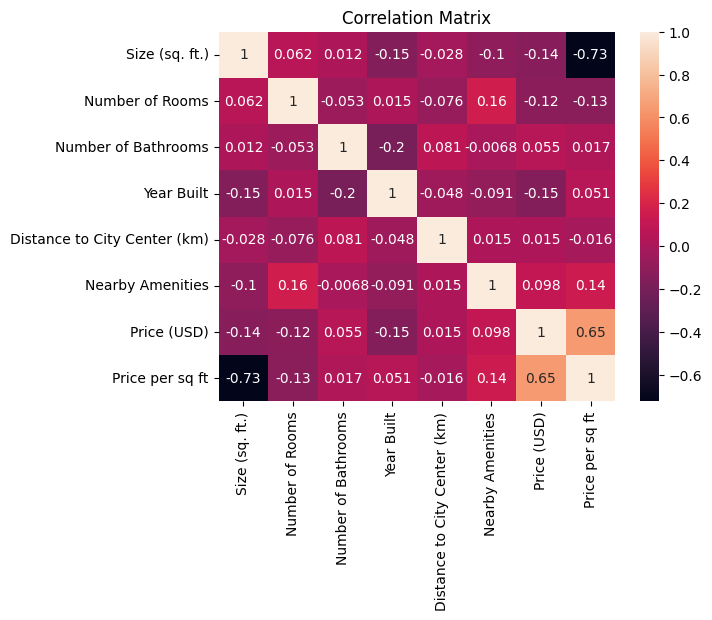

MAE: 249568.7515544176, MSE: 88605590636.92831, R²: -0.01598646105631718


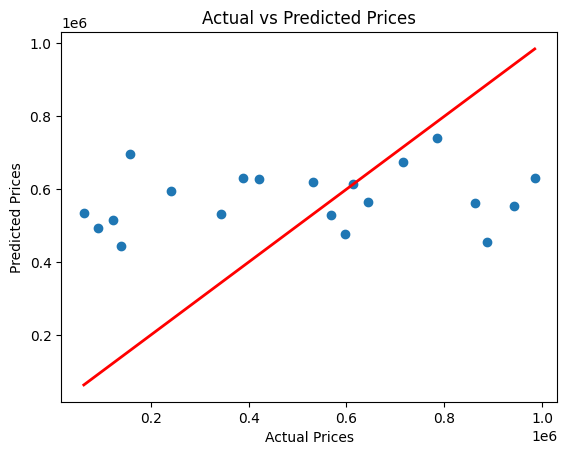

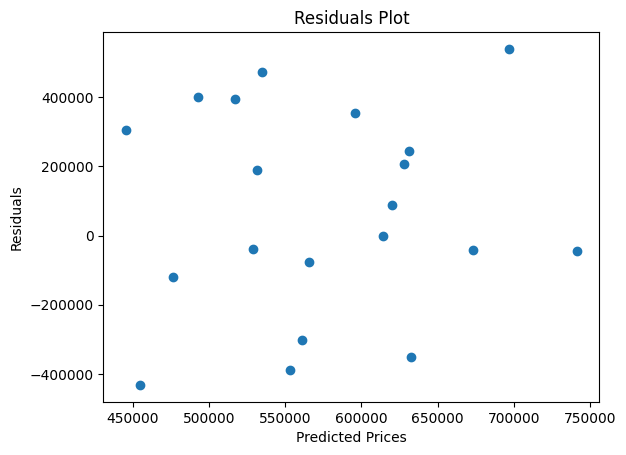

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from flask import Flask, request, jsonify

# Load the dataset
url = "C:\Users\Qamar\Music\Assignment\DSA\Python folders\Python reading\project folder\house_prices_dataset.csv"  # Update with your dataset path
data = pd.read_csv("C:\Users\Qamar\Music\Assignment\DSA\Python folders\Python reading\project folder\house_prices_dataset.csv")

# Display the first few rows of the dataset
print(data.head())

# Exploratory Data Analysis
print(data.describe())
print(data.info())

# Check for missing values (the output indicates there are none)
print(data.isnull().sum())

# Drop 'House ID' column since it's a unique identifier and doesn't contribute to the model
data = data.drop(columns=['House ID'])

# One-hot encode the 'Location' column (categorical variable)
data = pd.get_dummies(data, columns=['Location'], drop_first=True)

# Feature Engineering: Adding 'Price per sq ft' feature
data['Price per sq ft'] = data['Price (USD)'] / data['Size (sq. ft.)']

# Visualize Correlation Matrix (only numeric columns)
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Select Features and Target Variable
features = data.drop(columns=['Price (USD)', 'Price per sq ft'])  # Exclude target and engineered feature
target = data['Price (USD)']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling: StandardScaler for numerical features
scaler = StandardScaler()
X_train[['Size (sq. ft.)', 'Number of Rooms', 'Number of Bathrooms', 'Year Built',
         'Distance to City Center (km)', 'Nearby Amenities']] = scaler.fit_transform(
    X_train[['Size (sq. ft.)', 'Number of Rooms', 'Number of Bathrooms', 'Year Built',
             'Distance to City Center (km)', 'Nearby Amenities']])

X_test[['Size (sq. ft.)', 'Number of Rooms', 'Number of Bathrooms', 'Year Built',
        'Distance to City Center (km)', 'Nearby Amenities']] = scaler.transform(
    X_test[['Size (sq. ft.)', 'Number of Rooms', 'Number of Bathrooms', 'Year Built',
             'Distance to City Center (km)', 'Nearby Amenities']])

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
predictions = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')

# Plot Actual vs Predicted Prices
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()

# Plot Residuals (Predictions vs Residuals)
plt.scatter(predictions, predictions - y_test)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Save the trained model and scaler using joblib
joblib.dump(model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Flask API to serve the model
app = Flask(__name__)


# Load the trained model and scaler
model = joblib.load('linear_regression_model.pkl')
scaler = joblib.load('scaler.pkl')

if __name__ == '__main__':
    app.run(debug=True)



